In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv("product_segmentation_dataset.csv")
data.head()





,Product Category,Price (USD),Average Customer Rating,Units Sold,Stock Level,Discount Offered (%),Product Warranty,Return Rate (%)
0,Desk,568.06,3.9,199,38,43.85,Yes,1.42
1,Bed,1332.68,4.4,185,41,47.20,Yes,6.26
2,Cabinet,1334.05,4.3,212,54,7.44,Yes,18.71
3,Desk,731.02,2.6,216,61,23.13,Yes,17.01
4,Sofa,752.33,3.7,205,104,49.05,Yes,19.64


In [4]:
data.nunique()

,0
Product Category,7
Price (USD),273
Average Customer Rating,41
Units Sold,63
Stock Level,106
Discount Offered (%),334
Product Warranty,2
Return Rate (%),313


In [5]:
data.isnull().sum()

,0
Product Category,0
Price (USD),0
Average Customer Rating,0
Units Sold,0
Stock Level,0
Discount Offered (%),0
Product Warranty,0
Return Rate (%),0


In [6]:
# prompt: identify continuous and categorical variables

# Identify categorical and continuous variables
categorical_variables = [col for col in data.columns if data[col].dtype == 'object']
continuous_variables = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]

print("Categorical Variables:")
print(categorical_variables)

print("\nContinuous Variables:")
continuous_variables

Categorical Variables:
['Product Category', 'Product Warranty']

Continuous Variables:


['Price (USD)',
 'Average Customer Rating',
 'Units Sold',
 'Stock Level',
 'Discount Offered (%)',
 'Return Rate (%)']

In [7]:
# prompt: identify outliers in continous variables

# Identify outliers in continuous variables using IQR
def identify_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Example usage for 'Price' column
outliers_price = identify_outliers(data, 'Price (USD)')
print("\nOutliers in 'Price':")
print(outliers_price)

# Example usage for 'Discount' column
outliers_discount = identify_outliers(data, 'Units Sold')
print("\nOutliers in 'units sold:")
outliers_discount

outliers_discount = identify_outliers(data, 'Return Rate (%)')
print("\nOutliers in 'return rate':")
outliers_discount

# You can apply this function to other continuous variables as needed.
# Example: outliers_rating = identify_outliers(data, 'Rating')


Outliers in 'Price':
Empty DataFrame
Columns: [Product Category, Price (USD), Average Customer Rating, Units Sold, Stock Level, Discount Offered (%), Product Warranty, Return Rate (%)]
Index: []

Outliers in 'units sold:

Outliers in 'return rate':


,Product Category,Price (USD),Average Customer Rating,Units Sold,Stock Level,Discount Offered (%),Product Warranty,Return Rate (%)


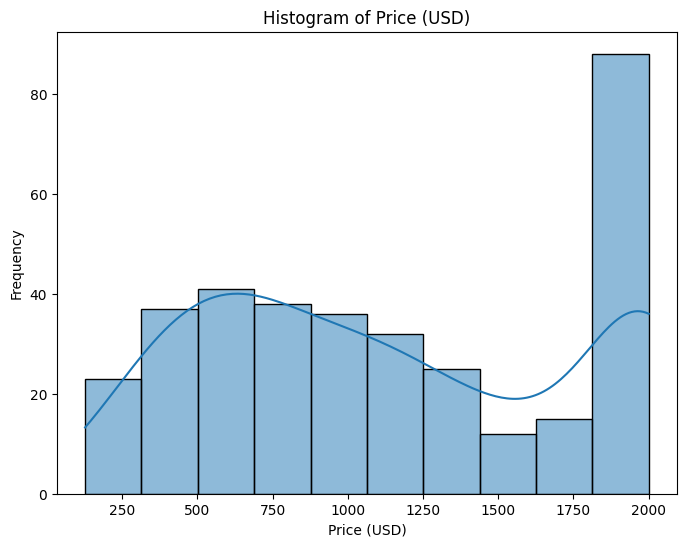

Skewness of Price (USD): 0.1861905888456796


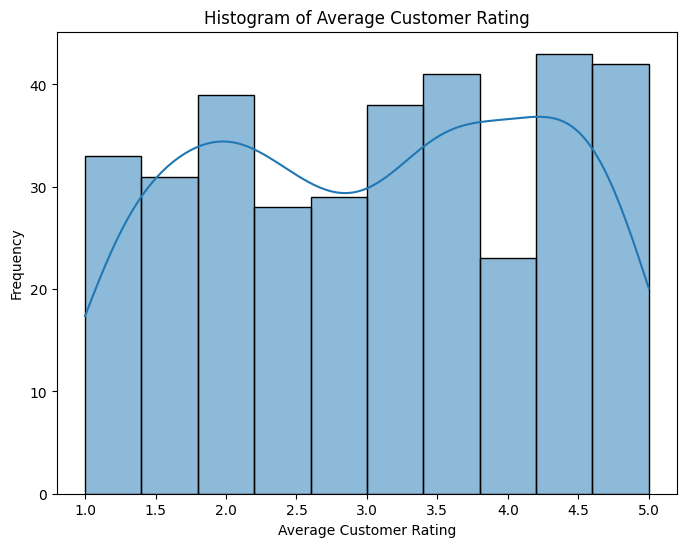

Skewness of Average Customer Rating: -0.0727573586999887


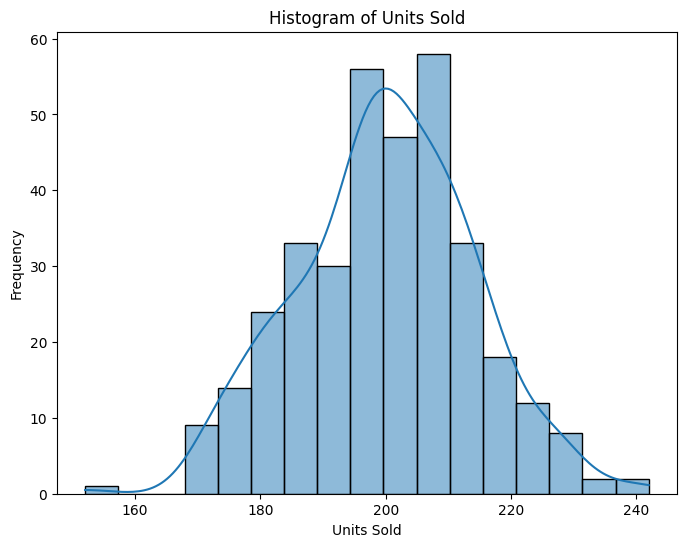

Skewness of Units Sold: -0.047359077230738636


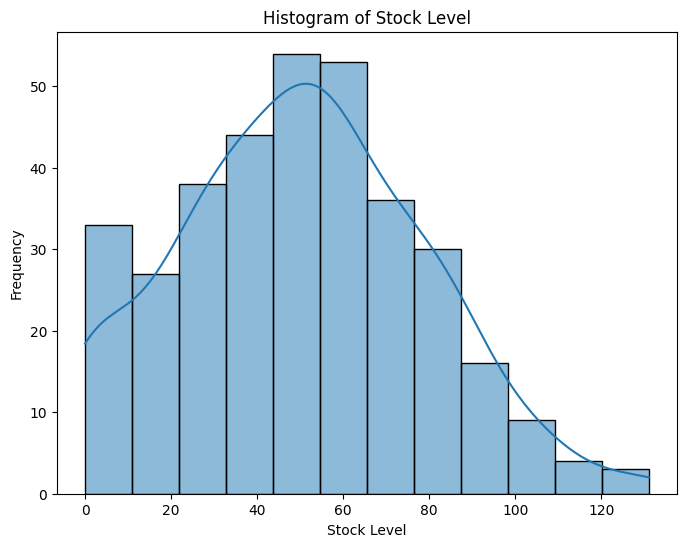

Skewness of Stock Level: 0.1813235775422585


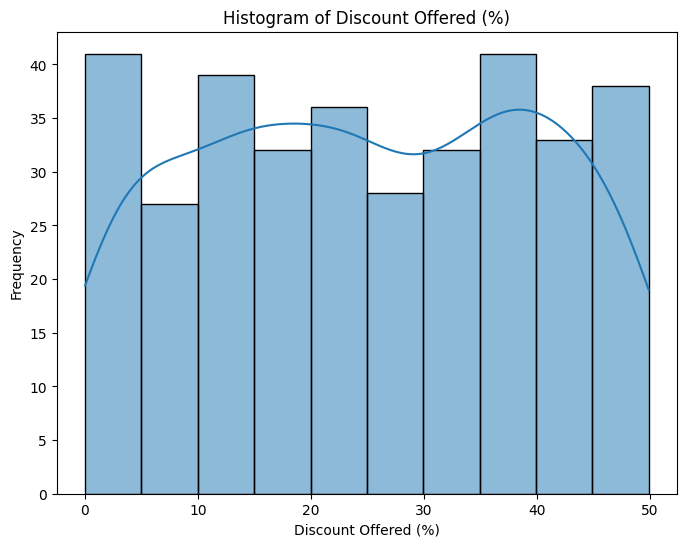

Skewness of Discount Offered (%): -0.025573306265862635


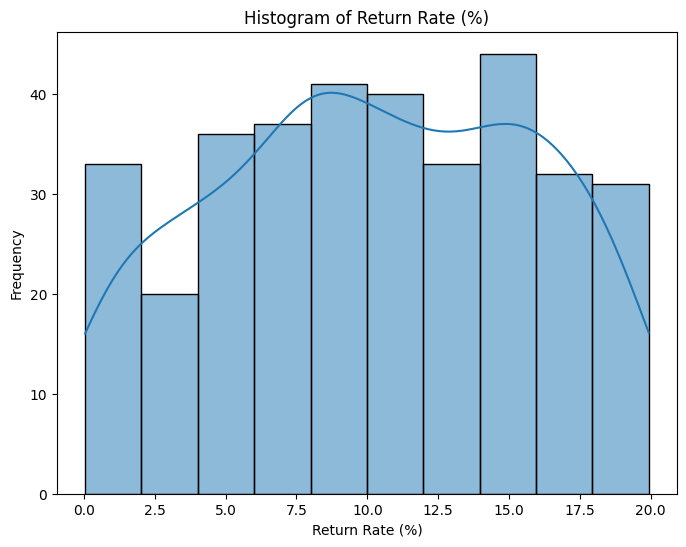

Skewness of Return Rate (%): -0.08055699778208969


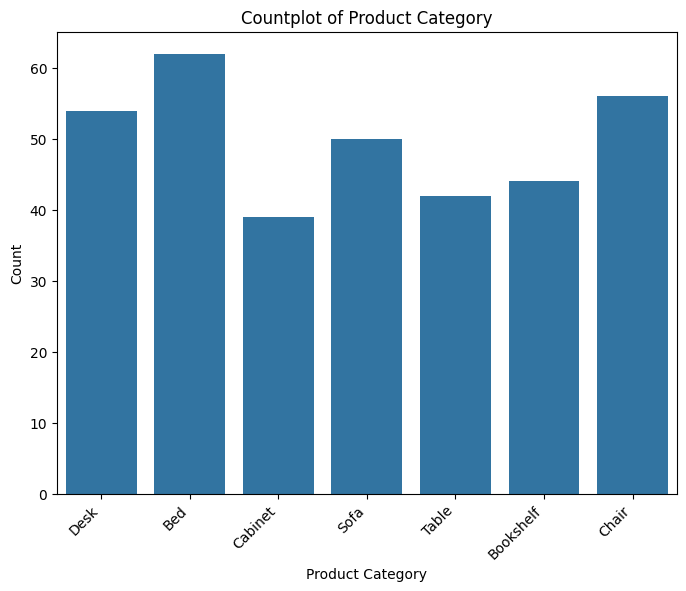

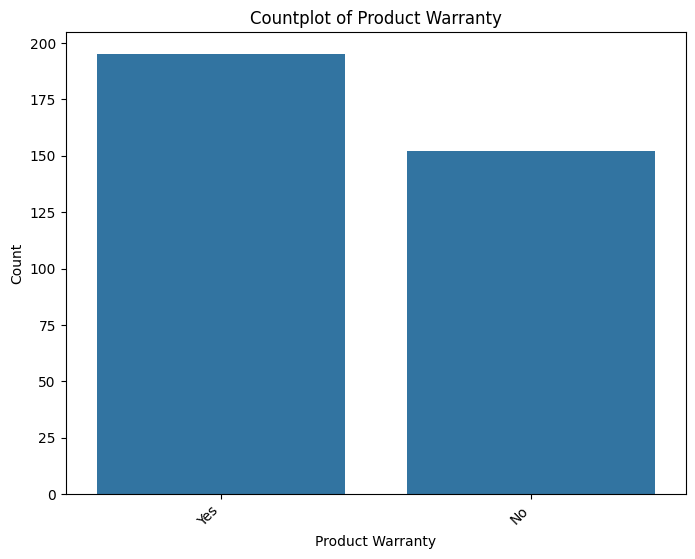

In [8]:
# prompt: graohs for all continuous and categorical variable(skew, histogram etc)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (your existing code) ...

# Plotting histograms and skewness for continuous variables
for col in continuous_variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    skewness = data[col].skew()
    print(f'Skewness of {col}: {skewness}')

# Plotting countplots for categorical variables
for col in categorical_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data)
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
    plt.show()

In [29]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data[['Price (USD)', 'Units Sold', 'Return Rate (%)']])

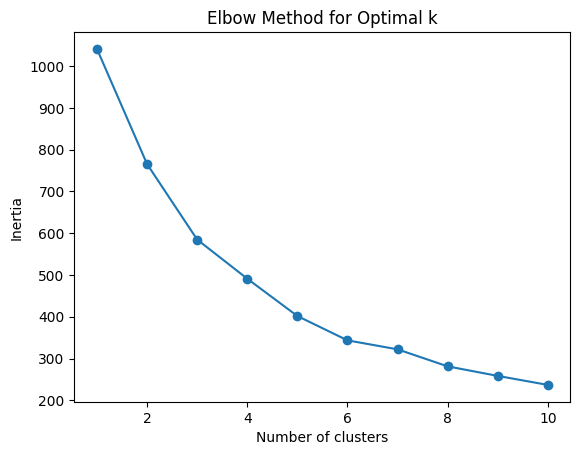

In [38]:
# prompt: use elbow method to find k

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [30]:
from sklearn.cluster import KMeans

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(normalized_data)

# Add cluster labels to the data
data['cluster'] = clusters

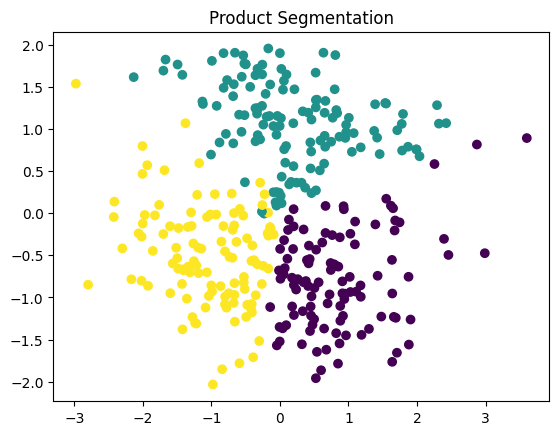

In [31]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_data)

# Scatter plot
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
plt.title("Product Segmentation")
plt.show()


Inventory

In [36]:
high_potential = data[(data['cluster'] == 1) & (data['Average Customer Rating'] > 4.5)]
print(high_potential)


    Product Category  Price (USD)  Average Customer Rating  Units Sold  \
27             Table      1107.74                      4.8         209   
32             Chair      2000.00                      4.6         214   
47               Bed      2000.00                      4.7         197   
57               Bed      2000.00                      4.6         185   
81             Table      2000.00                      4.7         200   
133             Sofa      2000.00                      4.9         202   
134          Cabinet      2000.00                      4.8         205   
198            Table      2000.00                      5.0         183   
200        Bookshelf      2000.00                      4.8         202   
213             Desk      1344.18                      4.7         205   
214              Bed      1436.67                      5.0         197   
231            Chair      2000.00                      4.8         197   
281        Bookshelf      1599.07     

In [14]:


# Inventory
# Group by clusters and calculate average sales volume
avg_sales_by_cluster = data.groupby('cluster')['Units Sold'].mean()
print(avg_sales_by_cluster)

# Identify the cluster with the highest average sales
high_demand_cluster = avg_sales_by_cluster.idxmax()
print(f"\nThe high-demand cluster is: {high_demand_cluster}")

#Further analysis of the high demand cluster
high_potential = data[data['cluster'] == high_demand_cluster]
high_potential

cluster
0    208.551402
1    201.348837
2    190.324324
Name: Units Sold, dtype: float64

The high-demand cluster is: 0


,Product Category,Price (USD),Average Customer Rating,Units Sold,Stock Level,Discount Offered (%),Product Warranty,Return Rate (%),cluster
0,Desk,568.06,3.9,199,38,43.85,Yes,1.42,0
6,Cabinet,344.31,2.2,199,25,43.18,Yes,4.95,0
8,Table,617.23,1.1,197,48,18.77,No,3.74,0
9,Sofa,924.49,1.3,200,36,14.29,No,0.40,0
14,Bed,1080.08,2.7,199,52,24.62,Yes,8.61,0
...,...,...,...,...,...,...,...,...,...
324,Bed,620.00,3.8,210,64,48.87,Yes,7.00,0
332,Bookshelf,833.68,2.7,211,76,8.13,Yes,6.94,0
333,Bed,814.72,4.8,212,108,28.25,Yes,7.82,0
334,Cabinet,355.67,2.7,199,83,38.58,No,3.17,0


In [15]:
# prompt: show the mean value in all the clusters

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load data
data = pd.read_csv("product_segmentation_dataset.csv")

scaler = StandardScaler()
normalized_data = scaler.fit_transform(data[['Price (USD)', 'Units Sold', 'Return Rate (%)']])

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(normalized_data)

# Add cluster labels to the data
data['cluster'] = clusters

# Calculate the mean value for all **numerical** features within each cluster
# Specify numeric_only=True to avoid errors with non-numeric columns
cluster_means = data.groupby('cluster').mean(numeric_only=True)
cluster_means

,Price (USD),Average Customer Rating,Units Sold,Stock Level,Discount Offered (%),Return Rate (%)
cluster,,,,,,
0,789.475327,3.083178,208.551402,51.588785,26.767103,5.737477
1,1811.848682,3.079845,201.348837,46.984496,25.159535,10.940853
2,709.871351,3.027027,190.324324,52.036036,23.385676,13.650450


In [23]:
data['Stock_to_Sales_Ratio'] = data['Stock Level'] / data['Units Sold']

# Identify Clusters for Optimization
data['Stock_Action'] = data['Stock_to_Sales_Ratio'].apply(lambda x: 'Reduce' if x > 0.25 else 'Increase')
print(data)

    Product Category  Price (USD)  Average Customer Rating  Units Sold  \
0               Desk       568.06                      3.9         199   
1                Bed      1332.68                      4.4         185   
2            Cabinet      1334.05                      4.3         212   
3               Desk       731.02                      2.6         216   
4               Sofa       752.33                      3.7         205   
..               ...          ...                      ...         ...   
342             Sofa       720.82                      1.9         203   
343              Bed      1622.14                      1.1         194   
344        Bookshelf       412.53                      3.6         183   
345            Chair      1939.91                      2.5         189   
346              Bed       904.82                      4.5         202   

     Stock Level  Discount Offered (%) Product Warranty  Return Rate (%)  \
0             38                 43

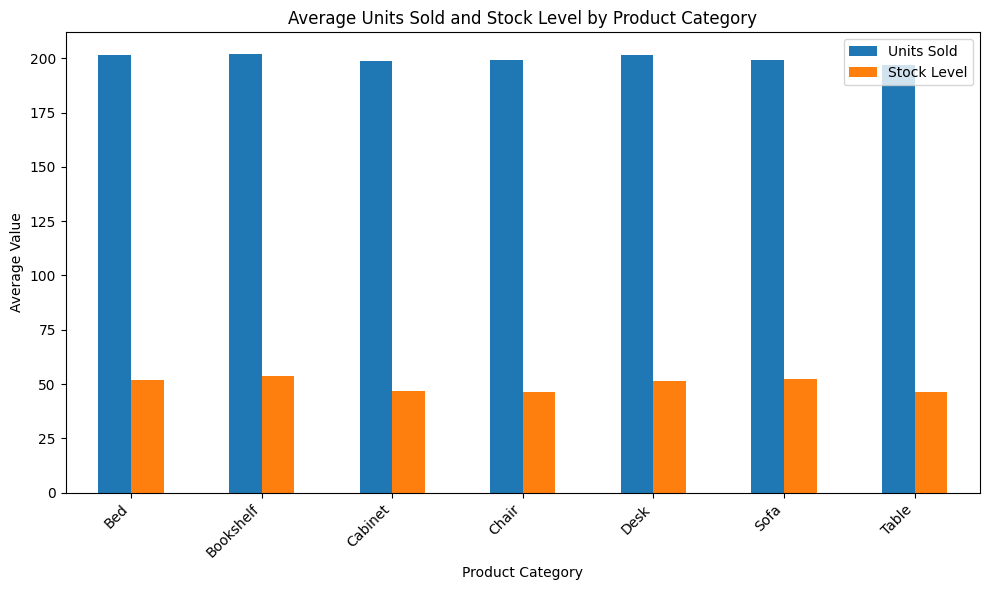

In [57]:
# prompt: chart for units sold and stock level for ecah product category

import matplotlib.pyplot as plt

# Assuming 'data' DataFrame is already loaded and processed as in the provided code

# Create the grouped bar chart
category_means = data.groupby('Product Category')[['Units Sold', 'Stock Level']].mean()
category_means.plot(kind='bar', figsize=(10, 6))
plt.title('Average Units Sold and Stock Level by Product Category')
plt.ylabel('Average Value')
plt.xlabel('Product Category')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

                         Average Customer Rating  Units Sold  Return Rate (%)
Average Customer Rating                 1.000000    0.006422        -0.011952
Units Sold                              0.006422    1.000000        -0.165725
Return Rate (%)                        -0.011952   -0.165725         1.000000


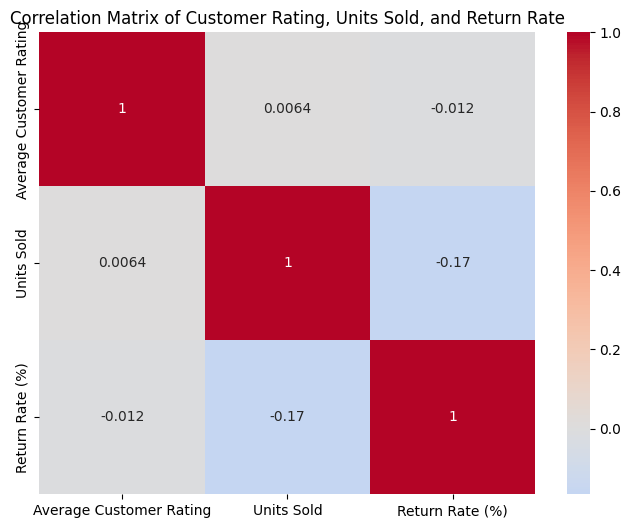

In [58]:
# prompt: correlation between average customer rating, units sold, return rate

# Assuming 'data' DataFrame is already loaded and processed as in the provided code

# Calculate the correlation matrix
correlation_matrix = data[['Average Customer Rating', 'Units Sold', 'Return Rate (%)']].corr()

# Print the correlation matrix
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Customer Rating, Units Sold, and Return Rate')
plt.show()

In [17]:
# prompt: identify which product category has the most sales,return rate,stock level

# Calculate the mean return rate and units sold for each cluster
cluster_stats = data.groupby('cluster').agg({'Return Rate (%)': 'mean', 'Units Sold': 'mean', 'Stock Level': 'mean'})

# Find the cluster with the highest average sales
highest_sales_cluster = cluster_stats['Units Sold'].idxmax()

# Find the cluster with the highest average return rate
highest_return_rate_cluster = cluster_stats['Return Rate (%)'].idxmax()

# Find the cluster with the highest average stock level
highest_stock_level_cluster = cluster_stats['Stock Level'].idxmax()


print(f"Cluster with highest average sales: {highest_sales_cluster}")
print(f"Cluster with highest average return rate: {highest_return_rate_cluster}")
print(f"Cluster with highest average stock level: {highest_stock_level_cluster}")

# You can further analyze the product categories within these clusters
# For example:
highest_sales_products = data[data['cluster'] == highest_sales_cluster]['Product Category'].unique()
print(f"Product categories with highest average sales: {highest_sales_products}")

highest_return_rate_products = data[data['cluster'] == highest_return_rate_cluster]['Product Category'].unique()
print(f"Product categories with highest average return rate: {highest_return_rate_products}")

highest_stock_level_products = data[data['cluster'] == highest_stock_level_cluster]['Product Category'].unique()
print(f"Product categories with highest average stock level: {highest_stock_level_products}")

Cluster with highest average sales: 0
Cluster with highest average return rate: 2
Cluster with highest average stock level: 2
Product categories with highest average sales: ['Desk' 'Cabinet' 'Table' 'Sofa' 'Bed' 'Bookshelf' 'Chair']
Product categories with highest average return rate: ['Desk' 'Sofa' 'Cabinet' 'Table' 'Chair' 'Bed' 'Bookshelf']
Product categories with highest average stock level: ['Desk' 'Sofa' 'Cabinet' 'Table' 'Chair' 'Bed' 'Bookshelf']


In [51]:
# prompt: top 3 peoduct categories in sales of units sold, stock level, return rate

# Calculate the mean return rate, units sold, and stock level for each cluster
cluster_stats = data.groupby('cluster').agg({'Return Rate (%)': 'mean', 'Units Sold': 'mean', 'Stock Level': 'mean'})

# Sort clusters by units sold in descending order and get the top 3
top_3_sales_clusters = cluster_stats.sort_values('Units Sold', ascending=False).head(3)

# Print the results
print("Top 3 Clusters by Units Sold:")
print(top_3_sales_clusters)

#Similarly for stock level and return rate
top_3_stock_clusters = cluster_stats.sort_values('Stock Level', ascending=False).head(3)
print("\nTop 3 Clusters by Stock Level:")
print(top_3_stock_clusters)


top_3_return_rate_clusters = cluster_stats.sort_values('Return Rate (%)', ascending=False).head(3)
print("\nTop 3 Clusters by Return Rate:")
top_3_return_rate_clusters

Top 3 Clusters by Units Sold:
         Return Rate (%)  Units Sold  Stock Level
cluster                                          
0               5.737477  208.551402    51.588785
1              10.940853  201.348837    46.984496
2              13.650450  190.324324    52.036036

Top 3 Clusters by Stock Level:
         Return Rate (%)  Units Sold  Stock Level
cluster                                          
2              13.650450  190.324324    52.036036
0               5.737477  208.551402    51.588785
1              10.940853  201.348837    46.984496

Top 3 Clusters by Return Rate:


,Return Rate (%),Units Sold,Stock Level
cluster,,,
2,13.650450,190.324324,52.036036
1,10.940853,201.348837,46.984496
0,5.737477,208.551402,51.588785


1.**How can FurniMart use clustering analysis to optimize its marketing spend and better
target product segments? What data would be most relevant for this analysis?**


I considered Price,Units sold, Return rate as the significant features for the clustering.

Cluster 0:
Moderate price, high sales, low return rate.

Includes categories like Desks, Cabinets, Tables, and Sofas.

Emphasize value and reliability through broad campaigns. Allocate a significant marketing budget to drive higher sales.Highlight customer satisfaction and affordability.

Cluster 1:
High price, moderate sales, moderate return rate.

Includes premium categories like Sofas and Beds.

Target niche, high-income customers.
Showcase luxury, exclusivity, and premium quality.

Cluster 2:
Low price, low sales, high return rate.


Includes categories like Desks, Sofas, and Chairs.

Reduce aggressive marketing to avoid increasing sales of problematic products. Focus instead on quality improvements.
Reposition as affordable but reliable products to address quality concerns.



2.**Given the issue of high return rates in certain product categories, what steps should
FurniMart take to address this problem? How can clustering help identify products that
need quality improvement or better customer targeting?**


Cluster 2: High Return Rate (13.65%)

How to Address:

Product Quality Improvements:
Analyze common materials or design flaws in products like Sofas, Desks, and Chairs.

Enhanced Descriptions:
Improve product images, dimensions, and usage guidance to manage customer expectations.

Better Targeting:
Market to customer segments that align with the product’s actual value and features.
Return Policy Adjustment:

Reduce leniency in returns for products with habitual return patterns.
How Clustering Helps:

Groups problematic products to identify shared characteristics (e.g., low ratings, high discounts).
Enables prioritization of resources to address underlying issues within these segments.

3.**What insights could FurniMart gain from a more detailed understanding of its inventory
management system? How might clustering help the company better align stock levels
with demand**?

Cluster 0 (Balanced Stock and Demand):

High sales (208.55), moderate stock levels (51.59), and low return rates.
Action: Maintain current inventory levels but monitor for potential stockouts during peak seasons.

Cluster 1 (Potential Stock Shortages):

Moderate sales (201.35) but lowest stock levels (46.98).
Action: Increase stock to avoid missed sales opportunities for premium categories.

Cluster 2 (Highest Stock Levels):

High stock levels (52.03) but low sales (190.32) and highest return rates.
Action: Reduce overstock for problematic products in this cluster. Improve forecasting to align inventory with realistic demand.

4.**How should FurniMart approach its pricing strategy based on the clustering of its product
portfolio? Should certain product segments be priced higher or lower, and why?**


Cluster 0 (High Sales, Low Returns):

Slight price increases may be sustainable without significantly impacting demand.
Experiment with dynamic pricing during peak demand periods.


Cluster 1 (Moderate Sales, Moderate Returns):

Test price reductions to improve affordability and increase sales.
Balance discounts with high-end branding to maintain premium perception.


Cluster 2 (Low Sales, High Returns):

Avoid further price reductions to prevent devaluing the products.
Instead, focus on improving quality to justify current pricing.


5.**Looking forward, what additional data points could FurniMart incorporate into its analysis
to stay competitive? How might changes in consumer preferences or new product
categories affect its segmentation strategy?**

Monitor Trends:

Track demand for features like sustainability or multifunctional furniture.
Introduce New Segments:

Develop and analyze clusters for new categories (e.g., smart furniture).
Dynamic Segmentation:

Periodically update clusters to reflect evolving preferences and behaviors.

